In [1]:
import yaml
import pandas as pd
import numpy as np
import re 

# exp_name = "GNNv3_v14_tuner_config_Criteo_distill"
# exp_name = "GNNv3_v17_tuner_config_Criteo"
# exp_name = "GNNv3_v19_tuner_config_Criteo"
# exp_name = "FinalNet_tuner_config_Criteo2"

# data = "Avazu"
# data = "KKBox"
# data = "ML1M"
# data = "iPinYou"
data = "Criteo"

# model_name = "SCV_light_loca_adadis_trash"
# model_name = "SCV_light_loca_adadis_strategy"
# model_name = "SCV_light_loca_adadis_mask"
# model_name = "SCV_light_loca_adadis3"
# model_name = "SCV_light_loca_adadis"
# model_name = "SCV_light_loca_adadis_fletle"
# model_name = "SCV_light_loca_adadis_loss"
# model_name = "SCV_light_loca_adadis_dot"
# model_name = "SCV_light_loca_adadis_dot2"
# model_name = "FinalNet"
model_name = "DCNv2"
# model_name = "AdaGIN"
# model_name = "MaskNetParallel"
# model_name = "FinalMLP"
# model_name = "DeepFM"
# model_name = "xDeepFM"
# model_name = "EulerNet"
# model_name = "EulerNet2"
# model_name = "AFN"
# model_name = "AFN"
# model_name = "AFN_2nd"
# model_name = "DCN"
# model_name = "SimCEN"
# model_name = "LR"
# model_name = "FM"
# model_name = "AdaGIN"
# model_name = "AutoInt"
# model_name = "GraphFM"
# model_name = "FiGNN"

exp_name = f"{model_name}_tuner_config_{data}"

# exp_name = "SCV_ada_tf_tuner_config_Criteo"
# exp_name = "SCV_heavy_loca_tuner_config_Criteo"
# exp_name = "SCV_light_loca_tuner_config_Criteo"
# exp_name = "SCV_light_loca_adadis_Criteo"

# exp_name = "SCV_light_loca_adadis_dropout_tuner_config_Criteo"
# exp_name = "SCV_light_loca_adadis_mask_tuner_config_Criteo"
# exp_name = "SCV_light_loca_adadis_stream_tuner_config_Criteo"

# exp_name = "SCV_light_loca_adadis_mask_tuner_config_iPinYou"

# exp_name = "GNNv3_v14_tuner_config_Avazu"
# exp_name = "GNNv3_v14_tuner_config_Avazu3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou_heavy"
# exp_name = "GNNv3_v14_tuner_config_iPinYou3"
# exp_name = "GNNv3_v14_tuner_config_iPinYou"
# exp_name = "GNNv3_v8_tuner_confi2g_iPinYou"
df_path = exp_name+".csv"
config_path = f"config/{exp_name}/model_config.yaml"

In [2]:
exp_df = pd.read_csv(df_path, names=["timestamp", "command", "exp_id", "dataset_id", "train", "val", "test"])
exp_df

,timestamp,command,exp_id,dataset_id,train,val,test
0,20241228-045529,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_035_ecf6f392,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.440293 - AUC: 0.811882,[test] logloss: 0.439937 - AUC: 0.812301
1,20241228-045618,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_017_5aae5ec7,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.438673 - AUC: 0.813422,[test] logloss: 0.438369 - AUC: 0.813805
2,20241228-050030,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_020_ff4b718d,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.439679 - AUC: 0.812755,[test] logloss: 0.439420 - AUC: 0.813089
3,20241228-050058,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_036_4a528a48,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.440416 - AUC: 0.812509,[test] logloss: 0.439994 - AUC: 0.812961
4,20241228-054855,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_004_66f827bb,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.439593 - AUC: 0.812379,[test] logloss: 0.439042 - AUC: 0.813047
5,20241228-055342,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_024_722eacf8,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.440063 - AUC: 0.812985,[test] logloss: 0.439734 - AUC: 0.813342
6,20241228-055420,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_010_f245f83b,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.438731 - AUC: 0.813302,[test] logloss: 0.438467 - AUC: 0.813622
7,20241228-060856,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_011_e86ee15b,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.439243 - AUC: 0.812906,[test] logloss: 0.438805 - AUC: 0.813380
8,20241228-063710,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_026_d232e8c5,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.439175 - AUC: 0.812886,[test] logloss: 0.438770 - AUC: 0.813426
9,20241228-063738,[command] python run_expid.py --config config/...,[exp_id] DCNv2_Criteo_014_77a7d980,[dataset_id] Criteo_x4_10_h5,[train] N.A.,[val] logloss: 0.439419 - AUC: 0.812591,[test] logloss: 0.439015 - AUC: 0.813065


In [3]:
exp_df = exp_df[["exp_id", "test"]]
exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
exp_df["test"] = exp_df["test"].apply(lambda x: [eval(item) for item in re.findall(r"\d+\.\d+|\d+", x)])
exp_df[['logloss', 'AUC']] = pd.DataFrame(exp_df['test'].to_list(), index=exp_df.index)
del exp_df["test"]
exp_df

/tmp/ipykernel_3982287/2652527789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["exp_id"] = exp_df["exp_id"].apply(lambda x: str(x.split("[exp_id]")[1]).strip())
/tmp/ipykernel_3982287/2652527789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["test"] = exp_df["test"].apply(lambda x: x.split("[test]")[1])
/tmp/ipykernel_3982287/2652527789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,exp_id,logloss,AUC
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805
2,DCNv2_Criteo_020_ff4b718d,0.439420,0.813089
3,DCNv2_Criteo_036_4a528a48,0.439994,0.812961
4,DCNv2_Criteo_004_66f827bb,0.439042,0.813047
5,DCNv2_Criteo_024_722eacf8,0.439734,0.813342
6,DCNv2_Criteo_010_f245f83b,0.438467,0.813622
7,DCNv2_Criteo_011_e86ee15b,0.438805,0.813380
8,DCNv2_Criteo_026_d232e8c5,0.438770,0.813426
9,DCNv2_Criteo_014_77a7d980,0.439015,0.813065


In [4]:
with open(config_path) as f:
    config_lst = yaml.load(f, Loader=yaml.FullLoader)
config_lst

{'DCNv2_Criteo_001_8884fce8': {'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'Criteo_x4_10_h5_49cec1bd',
  'debug_mode': False,
  'dnn_activations': 'ReLU',
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 1e-05,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'DCNv2',
  'model_root': './checkpoints/',
  'model_structure': 'parallel',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_dropout': 0.1,
  'net_regularizer': 0,
  'num_cross_layers': 2,
  'num_workers': 16,
  'optimizer': 'adam',
  'parallel_dnn_hidden_units': [400, 400, 400],
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shuffle': True,
  'stacked_dnn_hidden_units': [400, 400, 400],
  'task': 'binary_classification',
  'use_features': None,
  'use_low_rank_mixture': Fal

In [5]:
hyperparam_keys = list(list(config_lst.values())[0].keys())
total_exp_len = len(config_lst)
hyperparam_keys

['batch_norm',
 'batch_size',
 'dataset_id',
 'debug_mode',
 'dnn_activations',
 'early_stop_patience',
 'embedding_dim',
 'embedding_regularizer',
 'epochs',
 'eval_steps',
 'feature_config',
 'feature_specs',
 'group_id',
 'learning_rate',
 'loss',
 'metrics',
 'model',
 'model_root',
 'model_structure',
 'monitor',
 'monitor_mode',
 'net_dropout',
 'net_regularizer',
 'num_cross_layers',
 'num_workers',
 'optimizer',
 'parallel_dnn_hidden_units',
 'pickle_feature_encoder',
 'save_best_only',
 'seed',
 'shuffle',
 'stacked_dnn_hidden_units',
 'task',
 'use_features',
 'use_low_rank_mixture',
 'verbose']

In [6]:
config_df = pd.DataFrame(config_lst).T
config_df["exp_id"] = config_df.index
config_df["exp_id"] = config_df["exp_id"].apply(lambda x : str(x).strip())
config_df

,batch_norm,batch_size,dataset_id,debug_mode,dnn_activations,early_stop_patience,embedding_dim,embedding_regularizer,epochs,eval_steps,...,pickle_feature_encoder,save_best_only,seed,shuffle,stacked_dnn_hidden_units,task,use_features,use_low_rank_mixture,verbose,exp_id
DCNv2_Criteo_001_8884fce8,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_001_8884fce8
DCNv2_Criteo_002_5ba16ae6,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_002_5ba16ae6
DCNv2_Criteo_003_96ed0555,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,128,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_003_96ed0555
DCNv2_Criteo_004_66f827bb,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_004_66f827bb
DCNv2_Criteo_005_c4e42afe,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_005_c4e42afe
DCNv2_Criteo_006_b4571162,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_006_b4571162
DCNv2_Criteo_007_7d131371,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_007_7d131371
DCNv2_Criteo_008_243b71ee,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_008_243b71ee
DCNv2_Criteo_009_5aae5ec7,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_009_5aae5ec7
DCNv2_Criteo_010_f245f83b,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,0.00001,100,None,...,True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1,DCNv2_Criteo_010_f245f83b


In [7]:
exp_df.sort_values("AUC")

,exp_id,logloss,AUC
14,DCNv2_Criteo_033_b3b07c24,0.440132,0.812088
24,DCNv2_Criteo_029_be24dc13,0.439976,0.812273
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301
21,DCNv2_Criteo_028_c2689ec2,0.439626,0.812365
32,DCNv2_Criteo_031_7ebcc1cf,0.439830,0.812405
31,DCNv2_Criteo_025_04fbc0e4,0.439840,0.812419
34,DCNv2_Criteo_027_789a7337,0.439810,0.812431
35,DCNv2_Criteo_034_c0ed7bc1,0.439607,0.812513
12,DCNv2_Criteo_030_9a033f0b,0.439619,0.812569
16,DCNv2_Criteo_016_b93c514d,0.439074,0.812816


In [8]:
df = pd.merge(exp_df, config_df, on="exp_id")
df

,exp_id,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,dnn_activations,early_stop_patience,embedding_dim,...,parallel_dnn_hidden_units,pickle_feature_encoder,save_best_only,seed,shuffle,stacked_dnn_hidden_units,task,use_features,use_low_rank_mixture,verbose
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
2,DCNv2_Criteo_020_ff4b718d,0.439420,0.813089,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
3,DCNv2_Criteo_036_4a528a48,0.439994,0.812961,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
4,DCNv2_Criteo_004_66f827bb,0.439042,0.813047,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
5,DCNv2_Criteo_024_722eacf8,0.439734,0.813342,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
6,DCNv2_Criteo_010_f245f83b,0.438467,0.813622,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
7,DCNv2_Criteo_011_e86ee15b,0.438805,0.813380,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
8,DCNv2_Criteo_026_d232e8c5,0.438770,0.813426,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
9,DCNv2_Criteo_014_77a7d980,0.439015,0.813065,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1


In [9]:
# df[["mask_strategy", "AUC"]]

In [10]:
if "FinalNet" in exp_name:
    df["block1_hidden_units"] = df["block1_hidden_units"].apply(lambda x: str(x))
    df["block2_hidden_units"] = df["block2_hidden_units"].apply(lambda x: str(x))

In [11]:
df.head(5)

,exp_id,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,dnn_activations,early_stop_patience,embedding_dim,...,parallel_dnn_hidden_units,pickle_feature_encoder,save_best_only,seed,shuffle,stacked_dnn_hidden_units,task,use_features,use_low_rank_mixture,verbose
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805,True,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
2,DCNv2_Criteo_020_ff4b718d,0.439420,0.813089,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
3,DCNv2_Criteo_036_4a528a48,0.439994,0.812961,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1
4,DCNv2_Criteo_004_66f827bb,0.439042,0.813047,False,4096,Criteo_x4_10_h5_49cec1bd,False,ReLU,2,16,...,"[400, 400, 400]",True,True,2024,True,"[400, 400, 400]",binary_classification,None,False,1


In [12]:
# df["num_tower"]

In [13]:
for col in df.columns:
    if isinstance(df[col].iloc[0], (list, dict)):
        df[col] = df[col].astype(str)
# mask = df.apply(lambda col: col.apply(lambda x: isinstance(x, (list, dict))).any())
# cols_to_drop = mask[mask].index
# df[cols_to_drop] = df[cols_to_drop].apply(lambda x: str(x))

In [14]:
mask = (df.nunique(axis=0) > 1)
multi_value_columns = mask[mask].index
hyper_df = df[multi_value_columns]
hyper_df

,exp_id,logloss,AUC,batch_norm,embedding_dim,model_structure,net_dropout,num_cross_layers
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301,False,16,parallel,0.3,4
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805,True,16,parallel,0.2,3
2,DCNv2_Criteo_020_ff4b718d,0.439420,0.813089,False,16,stacked,0.2,3
3,DCNv2_Criteo_036_4a528a48,0.439994,0.812961,False,16,stacked,0.3,4
4,DCNv2_Criteo_004_66f827bb,0.439042,0.813047,False,16,stacked,0.1,2
5,DCNv2_Criteo_024_722eacf8,0.439734,0.813342,False,16,stacked,0.3,3
6,DCNv2_Criteo_010_f245f83b,0.438467,0.813622,True,16,stacked,0.3,2
7,DCNv2_Criteo_011_e86ee15b,0.438805,0.813380,False,16,parallel,0.3,2
8,DCNv2_Criteo_026_d232e8c5,0.438770,0.813426,True,16,stacked,0.1,4
9,DCNv2_Criteo_014_77a7d980,0.439015,0.813065,True,16,stacked,0.1,3


In [15]:
multi_value_columns = list(set(multi_value_columns) - set(["AUC", "logloss", "exp_id"]))
multi_value_columns

['embedding_dim',
 'net_dropout',
 'model_structure',
 'batch_norm',
 'num_cross_layers']

In [16]:
# hyper_df.groupby("num_tower")["AUC"].quantile([0.25, 0.75])

In [17]:
hyper_df

,exp_id,logloss,AUC,batch_norm,embedding_dim,model_structure,net_dropout,num_cross_layers
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301,False,16,parallel,0.3,4
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805,True,16,parallel,0.2,3
2,DCNv2_Criteo_020_ff4b718d,0.439420,0.813089,False,16,stacked,0.2,3
3,DCNv2_Criteo_036_4a528a48,0.439994,0.812961,False,16,stacked,0.3,4
4,DCNv2_Criteo_004_66f827bb,0.439042,0.813047,False,16,stacked,0.1,2
5,DCNv2_Criteo_024_722eacf8,0.439734,0.813342,False,16,stacked,0.3,3
6,DCNv2_Criteo_010_f245f83b,0.438467,0.813622,True,16,stacked,0.3,2
7,DCNv2_Criteo_011_e86ee15b,0.438805,0.813380,False,16,parallel,0.3,2
8,DCNv2_Criteo_026_d232e8c5,0.438770,0.813426,True,16,stacked,0.1,4
9,DCNv2_Criteo_014_77a7d980,0.439015,0.813065,True,16,stacked,0.1,3


In [18]:
# try:
#     del hyper_df["exp_id"]
# except:
#     pass
# hyper_df

In [19]:
# iqr = np.quantile(hyper_df["AUC"], q=0.75) - np.quantile(hyper_df["AUC"], q=0.25)
# hyper_df = hyper_df[
#     (hyper_df["AUC"] > np.quantile(hyper_df["AUC"], q=0.25) - iqr)
# ]
hyper_df

,exp_id,logloss,AUC,batch_norm,embedding_dim,model_structure,net_dropout,num_cross_layers
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301,False,16,parallel,0.3,4
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805,True,16,parallel,0.2,3
2,DCNv2_Criteo_020_ff4b718d,0.439420,0.813089,False,16,stacked,0.2,3
3,DCNv2_Criteo_036_4a528a48,0.439994,0.812961,False,16,stacked,0.3,4
4,DCNv2_Criteo_004_66f827bb,0.439042,0.813047,False,16,stacked,0.1,2
5,DCNv2_Criteo_024_722eacf8,0.439734,0.813342,False,16,stacked,0.3,3
6,DCNv2_Criteo_010_f245f83b,0.438467,0.813622,True,16,stacked,0.3,2
7,DCNv2_Criteo_011_e86ee15b,0.438805,0.813380,False,16,parallel,0.3,2
8,DCNv2_Criteo_026_d232e8c5,0.438770,0.813426,True,16,stacked,0.1,4
9,DCNv2_Criteo_014_77a7d980,0.439015,0.813065,True,16,stacked,0.1,3


In [20]:
# hyper_df = hyper_df[hyper_df["embedding_dim"] == 32]

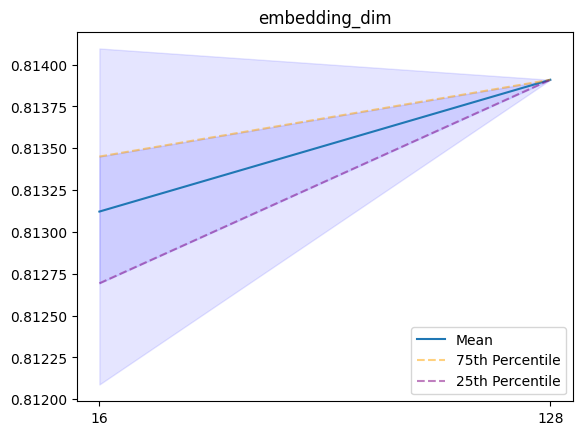

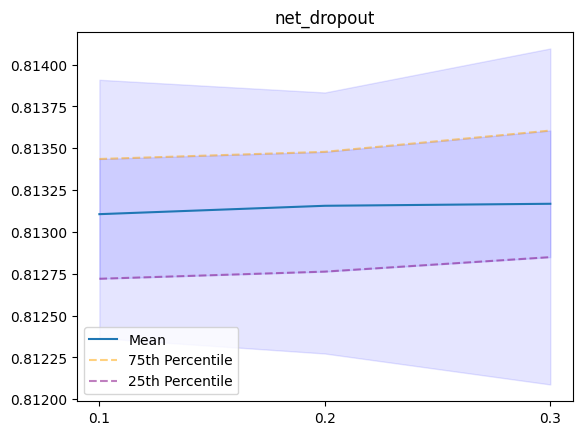

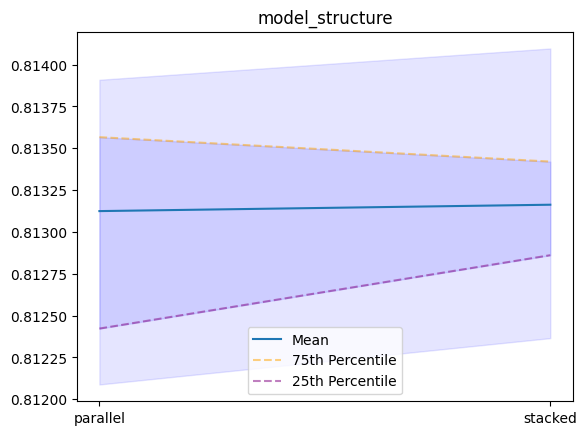

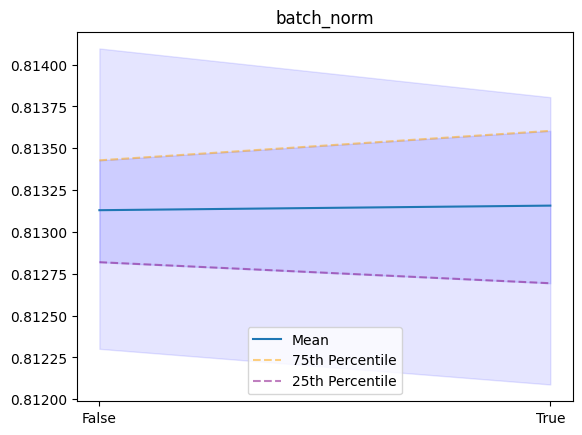

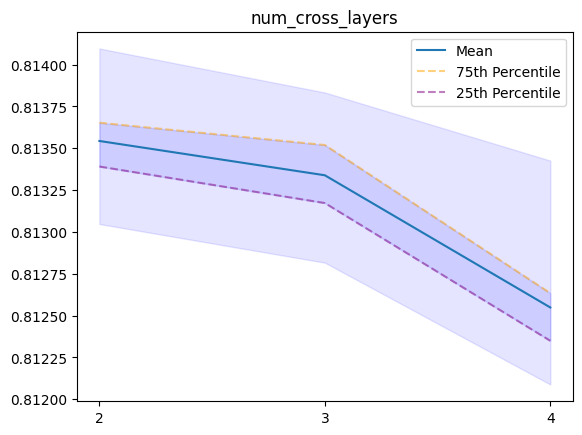

In [21]:
import matplotlib.pyplot as plt
import numpy as np

metric_name = "AUC"
idx = 1 if metric_name == "AUC" else 0
# AUC

# hyper_df = hyper_df[hyper_df["logloss"] < 0.3]

for col in multi_value_columns:
    x_label = hyper_df.groupby(col).max(metric_name).index.values
    x = np.arange(len(x_label))
    
    quantile = hyper_df.groupby(col)[metric_name].quantile([0.25, 0.75]).values.reshape(-1, 2)
    top_quantile = quantile[:, 1]
    bot_quantile = quantile[:, 0]
    
    max_val = hyper_df.groupby(col).max(metric_name).values[:, idx]
    mean_val = hyper_df.groupby(col).mean(metric_name).values[:, idx]
    min_val = hyper_df.groupby(col).min(metric_name).values[:, idx]

    plt.plot(x, mean_val, label="Mean")
    plt.fill_between(x, min_val, max_val, color="blue", alpha=0.1)
    plt.fill_between(x, bot_quantile, top_quantile, color="blue", alpha=0.1)
    
    # plt.plot(x, max_auc, color="red", linestyle="--", alpha=0.5, label="Max")  # Dotted line for max values
    # plt.plot(x, min_auc, color="green", linestyle="--", alpha=0.5, label="Min")  # Dotted line for min values
    plt.plot(x, top_quantile, color="orange", linestyle="--", alpha=0.5, label="75th Percentile")  # Dotted line for 75th percentile
    plt.plot(x, bot_quantile, color="purple", linestyle="--", alpha=0.5, label="25th Percentile")  # Dotted line for 25th percentile
    
    plt.xticks(ticks=x, labels=x_label)
    plt.title(col)
    plt.legend()
    plt.show()

In [22]:
hyper_df.sort_values("AUC", ascending=False).head(50)

,exp_id,logloss,AUC,batch_norm,embedding_dim,model_structure,net_dropout,num_cross_layers
27,DCNv2_Criteo_012_ff4b718d,0.439040,0.814096,False,16,stacked,0.3,2
30,DCNv2_Criteo_003_96ed0555,0.438189,0.813909,False,128,parallel,0.1,2
33,DCNv2_Criteo_019_e86ee15b,0.438292,0.813833,False,16,parallel,0.2,3
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805,True,16,parallel,0.2,3
28,DCNv2_Criteo_002_5ba16ae6,0.438474,0.813743,True,16,stacked,0.1,2
19,DCNv2_Criteo_021_72f197f2,0.438468,0.813684,True,16,parallel,0.3,3
6,DCNv2_Criteo_010_f245f83b,0.438467,0.813622,True,16,stacked,0.3,2
10,DCNv2_Criteo_006_b4571162,0.438528,0.813605,True,16,stacked,0.2,2
13,DCNv2_Criteo_009_5aae5ec7,0.438519,0.813600,True,16,parallel,0.3,2
17,DCNv2_Criteo_015_afca5b4a,0.438776,0.813464,False,16,parallel,0.1,3


In [23]:
hyper_df

,exp_id,logloss,AUC,batch_norm,embedding_dim,model_structure,net_dropout,num_cross_layers
0,DCNv2_Criteo_035_ecf6f392,0.439937,0.812301,False,16,parallel,0.3,4
1,DCNv2_Criteo_017_5aae5ec7,0.438369,0.813805,True,16,parallel,0.2,3
2,DCNv2_Criteo_020_ff4b718d,0.439420,0.813089,False,16,stacked,0.2,3
3,DCNv2_Criteo_036_4a528a48,0.439994,0.812961,False,16,stacked,0.3,4
4,DCNv2_Criteo_004_66f827bb,0.439042,0.813047,False,16,stacked,0.1,2
5,DCNv2_Criteo_024_722eacf8,0.439734,0.813342,False,16,stacked,0.3,3
6,DCNv2_Criteo_010_f245f83b,0.438467,0.813622,True,16,stacked,0.3,2
7,DCNv2_Criteo_011_e86ee15b,0.438805,0.813380,False,16,parallel,0.3,2
8,DCNv2_Criteo_026_d232e8c5,0.438770,0.813426,True,16,stacked,0.1,4
9,DCNv2_Criteo_014_77a7d980,0.439015,0.813065,True,16,stacked,0.1,3


In [24]:
# col = "shape"

# x_label = hyper_df.groupby(col).max(metric_name).index.values
# x = np.arange(len(x_label))

# quantile = hyper_df.groupby(col)[metric_name].quantile([0.25, 0.75]).values.reshape(-1, 2)
# top_quantile = quantile[:, 1]
# bot_quantile = quantile[:, 0]

# max_val = hyper_df.groupby(col).max(metric_name).values[:, idx]
# mean_val = hyper_df.groupby(col).mean(metric_name).values[:, idx]
# min_val = hyper_df.groupby(col).min(metric_name).values[:, idx]

# plt.plot(x, mean_val, label="Mean")
# plt.fill_between(x, min_val, max_val, color="blue", alpha=0.1)
# plt.fill_between(x, bot_quantile, top_quantile, color="blue", alpha=0.1)

# plt.plot(x, top_quantile, color="orange", linestyle="--", alpha=0.5, label="75th Percentile")  # Dotted line for 75th percentile
# plt.plot(x, bot_quantile, color="purple", linestyle="--", alpha=0.5, label="25th Percentile")  # Dotted line for 25th percentile

# reframed_x = [eval(item) for item in x_label]
# # reframed_x = [f"m={item[0]}, L={item[1] if len(item) > 1 else 1}" for item in reframed_x]
# reframed_x = [f"({item[0]}, {len(item)})" for item in reframed_x]
# plt.xticks(ticks=x, labels=reframed_x)
# # plt.title(col)
# plt.legend()
# plt.show()

In [25]:
# hyper_df = hyper_df[hyper_df["num_cross_layers"] >= 3]

In [26]:
from fvcore.nn import FlopCountAnalysis
import torch
from run_expid import get_model

# config_path = f"./config/{model_name}_tuner_config_{data}"
# expid = hyper_df.sort_values("AUC", ascending=False).head(50).iloc[3]["exp_id"]

config_path = "./config"
# expid = "AutoInt_Criteo"
# expid = "AutoInt_KKBox_x1"

# expid = "DCNv2_KKBox_x1"
expid = "GraphFM_Criteo"
# expid = "SCV_light_loca_adadis_Criteo"
# expid = "DCN_iPinYou_x1_002_424031e0"
# data="KKBox"
embedding_dim = 128 if "KKBox" in expid else 16

model = get_model(config_path, expid, embedding_dim=embedding_dim)
config_path, expid

/home/dxlab/jupyter/jinhee/scv/.venv/lib/python3.9/site-packages/fuxictr/pytorch/models/rank_model.py:65: UserWarning: mods argument is not needed anymore, you can stop passing it
  self.flop_counter = FlopCounterMode(mods=self, display=False, depth=None)


('./config', 'GraphFM_Criteo')

In [27]:
# model.Euler_interaction_layers

In [28]:
def count_parameters(model, count_embedding=True):
    total_params = 0
    for name, param in model.named_parameters(): 
        if not count_embedding and "embedding" in name:
            continue
        if param.requires_grad:
            total_params += param.numel()
    return total_params


In [29]:
from torch.utils.flop_counter import FlopCounterMode
flop_counter = FlopCounterMode(mods=model, display=False, depth=999999)

/tmp/ipykernel_3982287/3155362762.py:2: UserWarning: mods argument is not needed anymore, you can stop passing it
  flop_counter = FlopCounterMode(mods=model, display=False, depth=999999)


In [30]:
from run_expid import load_config, FeatureProcessor, build_dataset, FeatureMap, model_zoo, RankDataLoader
import os

params = load_config(config_path, expid)
params['gpu'] = -1
params["experiment_id"] = expid
params['embedding_dim'] = embedding_dim
data_dir = os.path.join(params['data_root'], params['dataset_id'])
feature_map_json = os.path.join(data_dir, "feature_map.json")
if params["data_format"] == "csv":
    feature_encoder = FeatureProcessor(**params)
    params["train_data"], params["valid_data"], params["test_data"] = \
            build_dataset(feature_encoder, **params)
feature_map = FeatureMap(params['dataset_id'], data_dir)
feature_map.load(feature_map_json, params)
model_class = getattr(model_zoo, params['model'])
model = model_class(feature_map, **params)
model.count_parameters() # print number of parameters used in model

test_gen = RankDataLoader(feature_map, stage='test', **params).make_iterator()

fucking {'active': True, 'dtype': 'float', 'fill_na': 0, 'na_value': 0, 'name': ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13'], 'preprocess': 'convert_to_bucket', 'type': 'categorical'}
fucking {'active': True, 'dtype': 'str', 'fill_na': '', 'na_value': '', 'name': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'], 'type': 'categorical'}


/home/dxlab/jupyter/jinhee/scv/.venv/lib/python3.9/site-packages/fuxictr/pytorch/models/rank_model.py:65: UserWarning: mods argument is not needed anymore, you can stop passing it
  self.flop_counter = FlopCounterMode(mods=self, display=False, depth=None)


In [31]:
with flop_counter:
    with torch.no_grad():
        for batch_index, batch_data in enumerate(test_gen):
            loss = model(batch_data)
            break
total_flops =  flop_counter.get_total_flops()
total_flops

7565213696

In [32]:
int(total_flops / list(batch_data.values())[0].shape[0])

1846976

In [33]:
count_parameters(model, count_embedding=True), count_parameters(model, count_embedding=False)

(15241946, 669994)

In [34]:
# hyper_df[(hyper_df["embedding_dim"] == 32) & hyper_df["use_feature_gating"] == True].sort_values("AUC", ascending=False).head(5)

![{D7F54725-CA81-43C5-A9E7-1FB797E1674D}.png](attachment:{D7F54725-CA81-43C5-A9E7-1FB797E1674D}.png)

https://optuna.readthedocs.io/en/stable/reference/samplers/index.html

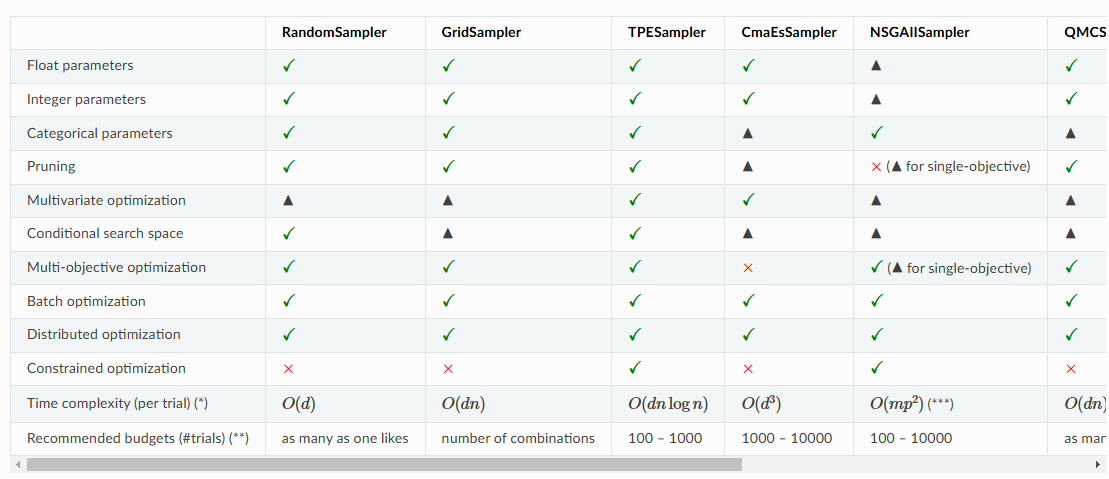

In [35]:
for col in multi_value_columns:
    hyperparam_cnt_lst = np.array(hyper_df.groupby(col).count()["exp_id"].tolist())
    norm_lst = list(hyperparam_cnt_lst/total_exp_len)
    print(col)
    print(list(hyper_df.groupby(col).count().index))
    print([eval("{:.1f}".format(item*100)) for item in norm_lst])

embedding_dim
[16, 128]
[97.2, 2.8]
net_dropout
[0.1, 0.2, 0.3]
[33.3, 33.3, 33.3]
model_structure
['parallel', 'stacked']
[50.0, 50.0]
batch_norm
[False, True]
[50.0, 50.0]
num_cross_layers
[2, 3, 4]
[33.3, 33.3, 33.3]


In [36]:
import numpy as np

probs = np.load("y_pred.npy")
probs

FileNotFoundError: [Errno 2] No such file or directory: 'y_pred.npy'

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
np.save("y_pred.npy", probs)
plt.hist(probs, bins=100, density=True, alpha=0.75, color='blue')
plt.title("Power Law Distributed Tensor Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)


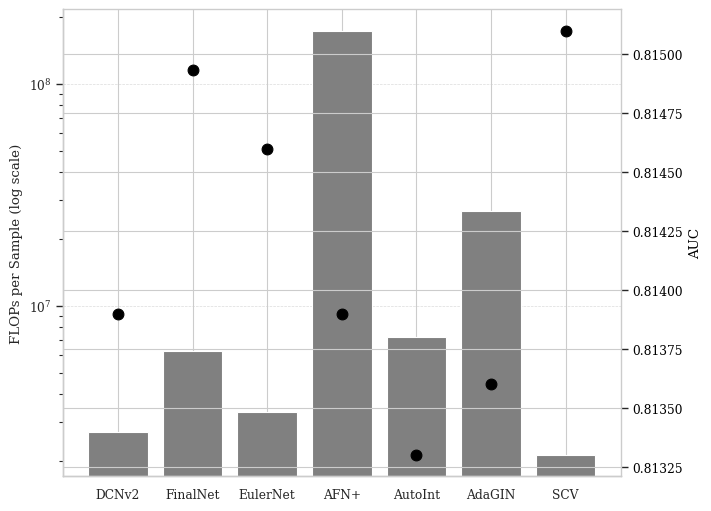

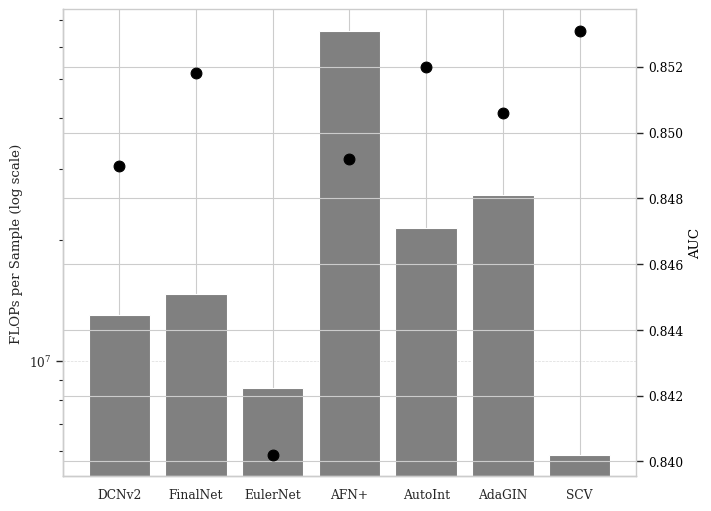

In [ ]:
# ------------------------------------------------------------
# FLOPs vs AUC ― Criteo & KKBox
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# ──────────────────────────────────────────────────────────────
# 1. 스타일 설정 (NeurIPS 풍)
# ──────────────────────────────────────────────────────────────
sns.set_context("paper")
sns.set_style("whitegrid")

plt.rcParams.update({
    "font.family": "serif",               # 논문용 Serif 계열
    # # 시스템에 Times New Roman 없으면 DejaVu Serif 등으로 자동 대체
    # "axes.titlesize": 12,
    # "axes.labelsize": 11,
    # "xtick.labelsize": 10,
    # "ytick.labelsize": 10,
})

# ──────────────────────────────────────────────────────────────
# 2. 데이터 정의
# ──────────────────────────────────────────────────────────────
models = ["DCNv2", "FinalNet", "EulerNet", "AFN+", "AutoInt", "AdaGIN", "SCV"]

# Criteo (batch 4096 → FLOPs/sample = FLOPs/batch ÷ 4096)
criteo_flops_batch = [
    11_054_088_192, 25_572_802_560, 13_566_738_432, 712_094_531_584,
    29_676_404_736, 109_675_216_896, 8_694_005_760
]
criteo_flops = [v / 4096 for v in criteo_flops_batch]
criteo_auc   = [0.8139, 0.814932, 0.8146, 0.8139, 0.8133, 0.8136, 0.8151]

# KKBox (batch 10 000 → FLOPs/sample = FLOPs/batch ÷ 10 000)
kkbox_flops_batch = [
    130_509_120_000, 146_600_000_000, 85_913_600_000, 660_496_040_000,
    214_141_760_000, 258_789_160_000, 58_422_080_000
]
kkbox_flops = [v / 10_000 for v in kkbox_flops_batch]
kkbox_auc   = [0.848968, 0.8518, 0.840187, 0.8492, 0.8520, 0.8506, 0.8531]

# 색상 팔레트 (마지막 색상까지 6개)
colors = ['#A6CEE3', '#1F78B4', '#B2DF8A',
          '#33A02C', '#FB9A99', '#CAB2D6']

# ──────────────────────────────────────────────────────────────
# 3. 플롯
# ──────────────────────────────────────────────────────────────
# Criteo Plot
fig, ax1 = plt.subplots(figsize=(7, 5), constrained_layout=True)
x = range(len(models))
ax1.bar(x, criteo_flops, color=["gray"] * len(colors))
ax1.set_yscale('log')
ax1.set_ylabel("FLOPs per Sample (log scale)")
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=0)
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax1b = ax1.twinx()
ax1b.scatter(x, criteo_auc, color='black', s=60, zorder=5)
ax1b.set_ylabel("AUC", color='black')
ax1b.tick_params(axis='y', labelcolor='black')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.show()

# KKBox Plot
fig, ax2 = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax2.bar(x, kkbox_flops, color=["gray"] * len(colors))
ax2.set_yscale('log')
ax2.set_ylabel("FLOPs per Sample (log scale)")
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=0)
ax2.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax2b = ax2.twinx()
ax2b.scatter(x, kkbox_auc, color='black', s=60, zorder=5)
ax2b.set_ylabel("AUC", color='black')
ax2b.tick_params(axis='y', labelcolor='black')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()


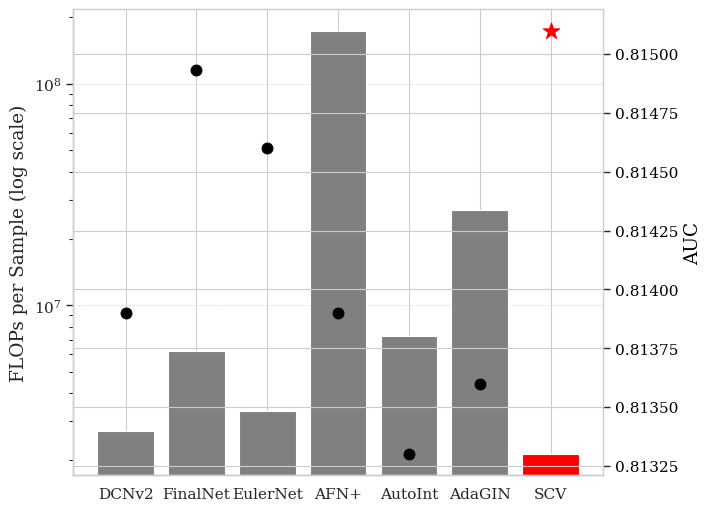

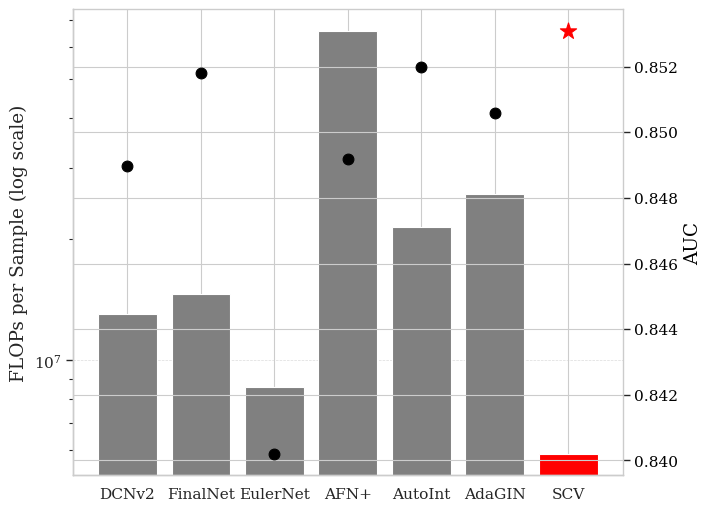

In [ ]:
# ──────────────────────────────────────────────────────────────
# 3. 플롯 ― Criteo
# ──────────────────────────────────────────────────────────────
font_dict = {
    'font.size': 40,            # 기본 폰트 크기
    'axes.titlesize': 40,       # axes title
    'axes.labelsize': 36,       # x/y축 label
    'xtick.labelsize': 30,      # x축 tick
    'ytick.labelsize': 30,      # y축 tick
    'legend.fontsize': 28,      # 범례
    'figure.titlesize': 42      # figure 제목 (plt.suptitle 등)
}
font_dict = {key: value / 2.7 for key, value in font_dict.items()}
plt.rcParams.update(font_dict)

fig, ax1 = plt.subplots(figsize=(7, 5), constrained_layout=True)
x = range(len(models))
ax1.bar(x, criteo_flops, color=["gray"] * (len(colors)) + ["red"])
ax1.set_yscale('log')
ax1.set_ylabel("FLOPs per Sample (log scale)")
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=0)
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax1b = ax1.twinx()
max_idx = criteo_auc.index(max(criteo_auc))
for i in x:
    marker = '*' if i == max_idx else 'o'
    size = 150 if i == max_idx else 60
    color = 'red' if i == max_idx else 'black'
    ax1b.scatter(i, criteo_auc[i], color=color, marker=marker, s=size, zorder=6)

ax1b.set_ylabel("AUC", color='black')
ax1b.tick_params(axis='y', labelcolor='black')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.show()

# ──────────────────────────────────────────────────────────────
# 4. 플롯 ― KKBox
# ──────────────────────────────────────────────────────────────
fig, ax2 = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax2.bar(x, kkbox_flops, color=["gray"] * (len(colors)) + ["red"])
ax2.set_yscale('log')
ax2.set_ylabel("FLOPs per Sample (log scale)")
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=0)
ax2.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax2b = ax2.twinx()
max_idx2 = kkbox_auc.index(max(kkbox_auc))
for i in x:
    marker = '*' if i == max_idx2 else 'o'
    size = 150 if i == max_idx2 else 60
    color = 'red' if i == max_idx2 else 'black'
    ax2b.scatter(i, kkbox_auc[i], color=color, marker=marker, s=size, zorder=6)

ax2b.set_ylabel("AUC", color='black')
ax2b.tick_params(axis='y', labelcolor='black')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.show()


In [ ]:
# ──────────────────────────────────────────────────────────────
# 5. FLOPs 대비 AUC 계산
# ──────────────────────────────────────────────────────────────
criteo_efficiency = [auc / flops for auc, flops in zip(criteo_auc, criteo_flops)]
kkbox_efficiency = [auc / flops for auc, flops in zip(kkbox_auc, kkbox_flops)]



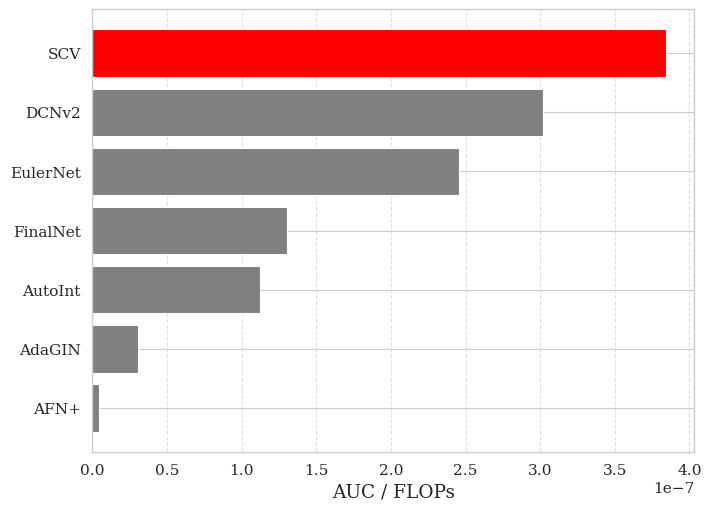

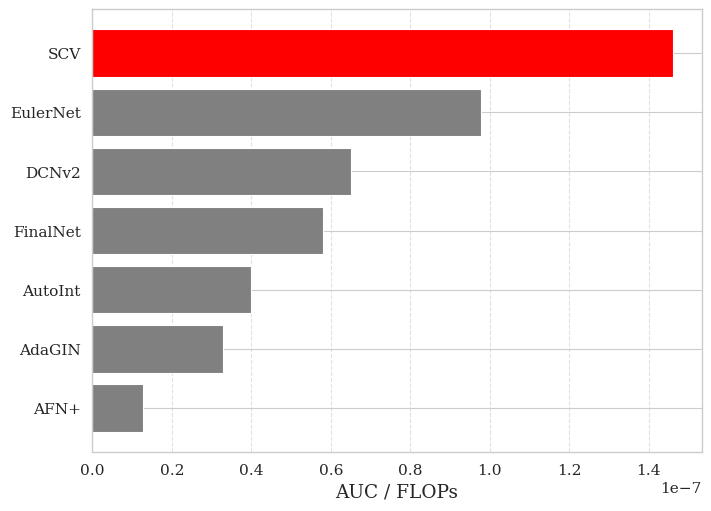

In [ ]:
# Criteo 정렬
criteo_eff_sorted = sorted(zip(models, criteo_efficiency), key=lambda x: x[1], reverse=True)
kkbox_eff_sorted = sorted(zip(models, kkbox_efficiency), key=lambda x: x[1], reverse=True)

# 색상 지정 함수
def get_colors(sorted_list):
    return ['red' if i == 0 else 'gray' for i in range(len(sorted_list))]

# Criteo
fig, ax7 = plt.subplots(figsize=(7, 5), constrained_layout=True)
names, values = zip(*criteo_eff_sorted)
ax7.barh(range(len(values)), values, color=get_colors(criteo_eff_sorted))
ax7.set_yticks(range(len(names)))
ax7.set_yticklabels(names)
ax7.invert_yaxis()
ax7.set_xlabel("AUC / FLOPs")
# ax7.set_title("Model Efficiency Ranking ― Criteo")
ax7.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# KKBox
fig, ax8 = plt.subplots(figsize=(7, 5), constrained_layout=True)
names2, values2 = zip(*kkbox_eff_sorted)
ax8.barh(range(len(values2)), values2, color=get_colors(kkbox_eff_sorted))
ax8.set_yticks(range(len(names2)))
ax8.set_yticklabels(names2)
ax8.invert_yaxis()
ax8.set_xlabel("AUC / FLOPs")
# ax8.set_title("Model Efficiency Ranking ― KKBox")
ax8.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
finalnet_idx = models.index("FinalNet")
SCV_idx = models.index("SCV")

(criteo_flops_batch[finalnet_idx] - criteo_flops_batch[SCV_idx])/criteo_flops_batch[finalnet_idx]

0.6600292150380564

In [ ]:
finalnet_idx = models.index("FinalNet")
SCV_idx = models.index("SCV")

(kkbox_flops_batch[finalnet_idx] - kkbox_flops_batch[SCV_idx])/kkbox_flops_batch[finalnet_idx]

0.6014864938608459

In [ ]:
finalnet_idx = models.index("AdaGIN")
SCV_idx = models.index("SCV")

(criteo_flops_batch[finalnet_idx] - criteo_flops_batch[SCV_idx])/criteo_flops_batch[finalnet_idx]

0.9207295321034639

In [ ]:
(criteo_flops[finalnet_idx] - criteo_flops[SCV_idx])/criteo_flops[finalnet_idx]

0.9207295321034639

In [ ]:
criteo_flops[SCV_idx]

2122560.0

In [ ]:
finalnet_idx = models.index("AdaGIN")
SCV_idx = models.index("SCV")

(kkbox_flops_batch[finalnet_idx] - kkbox_flops_batch[SCV_idx])/kkbox_flops_batch[finalnet_idx]

0.7742483495058293